# Fandango Movie Rating Analysis

Inspired from 538 article: https://fivethirtyeight.com/features/fandango-movies-ratings

# Step 0: Install all necessary libraries

In [1]:
!pip install wget
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Step 1: Download the data

In [2]:
import wget

fandango_scrape_url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/fandango/fandango_scrape.csv"
fandango_score_comparison_url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/fandango/fandango_score_comparison.csv"

fandango_scrape_path = "./fandango_scrape.csv"
fandango_score_comparison_path = "./fandango_score_comparison.csv"

wget.download(fandango_scrape_url, fandango_scrape_path)
wget.download(fandango_score_comparison_url, fandango_score_comparison_path)

print()
print(f"{fandango_scrape_path} downloaded.")
print(f"{fandango_score_comparison_path} downloaded.")

100% [..........................................................] 15144 / 15144
./fandango_scrape.csv downloaded.
./fandango_score_comparison.csv downloaded.


In [3]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Read the data

In [4]:
fandango = pd.read_csv('./fandango_scrape.csv')

In [5]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    510 non-null    object 
 1   STARS   510 non-null    float64
 2   RATING  510 non-null    float64
 3   VOTES   510 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 16.1+ KB


In [6]:
fandango.head(8)

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337
6,Kingsman: The Secret Service (2015),4.5,4.2,15205
7,Minions (2015),4.0,4.0,14998


In [7]:
fandango.describe()

,STARS,RATING,VOTES
count,510.000000,510.000000,510.000000
mean,3.532353,3.351765,1134.364706
std,1.585616,1.512628,3809.952176
min,0.000000,0.000000,0.000000
25%,3.500000,3.025000,2.000000
50%,4.000000,3.800000,17.500000
75%,4.500000,4.300000,183.500000
max,5.000000,5.000000,34846.000000


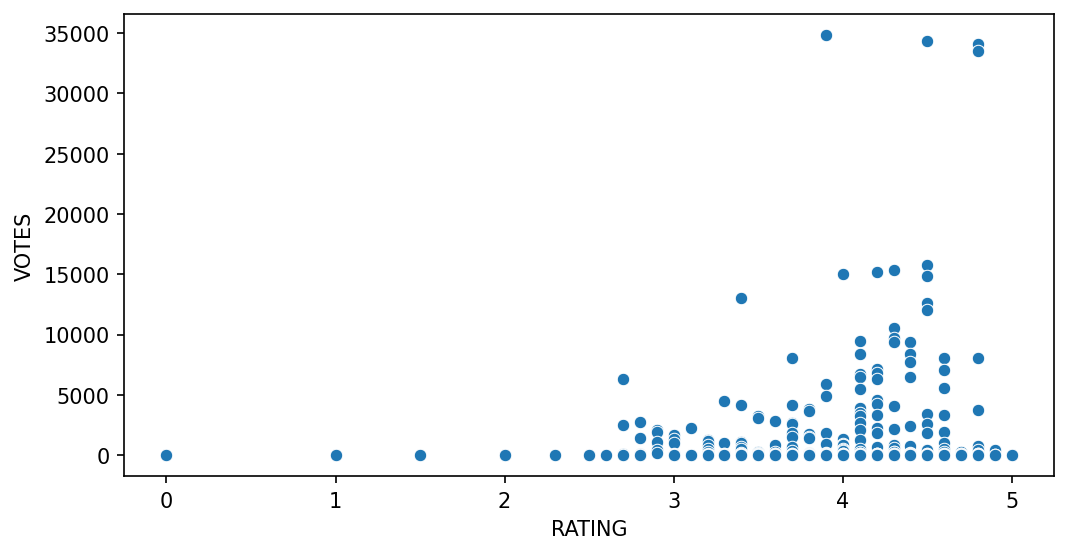

In [8]:
# relationship between movie rating and movie votes (popularity)
plt.figure(figsize=(8,4),dpi=150)
sns.scatterplot(data=fandango,x='RATING',y='VOTES');

In [9]:
fandango.corr(numeric_only=True)

,STARS,RATING,VOTES
STARS,1.000000,0.994870,0.165774
RATING,0.994870,1.000000,0.165147
VOTES,0.165774,0.165147,1.000000


In [10]:
# seems like there is no strong relationship between votes and rating

In [11]:
fandango

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749
...,...,...,...,...
505,Valiyavan (2015),0.0,0.0,0
506,WWE SummerSlam 2015 (2015),0.0,0.0,0
507,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0
508,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0


In [12]:
fandango['YEAR'] = fandango['FILM'].apply(lambda title:title.split('(')[-1][:-1])

In [13]:
fandango.head(4)

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015


In [14]:
fandango['YEAR'].value_counts()

2015    478
2014     23
1         7
2016      1
1964      1
Name: YEAR, dtype: int64

<Axes: xlabel='YEAR', ylabel='count'>

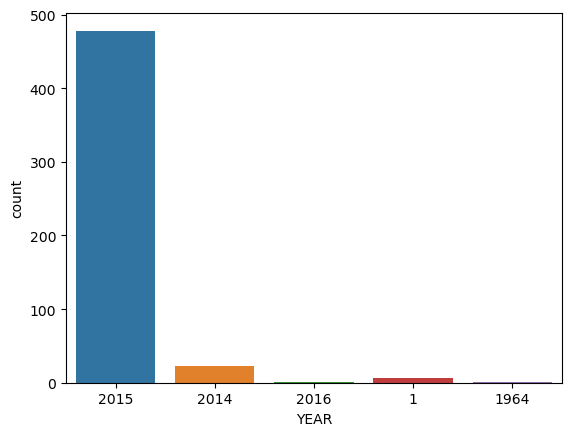

In [15]:
# let's visualize it
sns.countplot(data=fandango,x='YEAR')

In [16]:
# hmm, 2015 movies take the majority

In [17]:
# let's see top 10 movies
fandango.nlargest(10, 'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [18]:
# how many movies have zero votes then?
no_votes = fandango['VOTES']==0 
no_votes.sum()

73

In [19]:
# let's keep only voted movies
fan_reviewed = fandango[fandango['VOTES']>0]

In [20]:
len(fandango)

510

In [21]:
len(fan_reviewed)

437

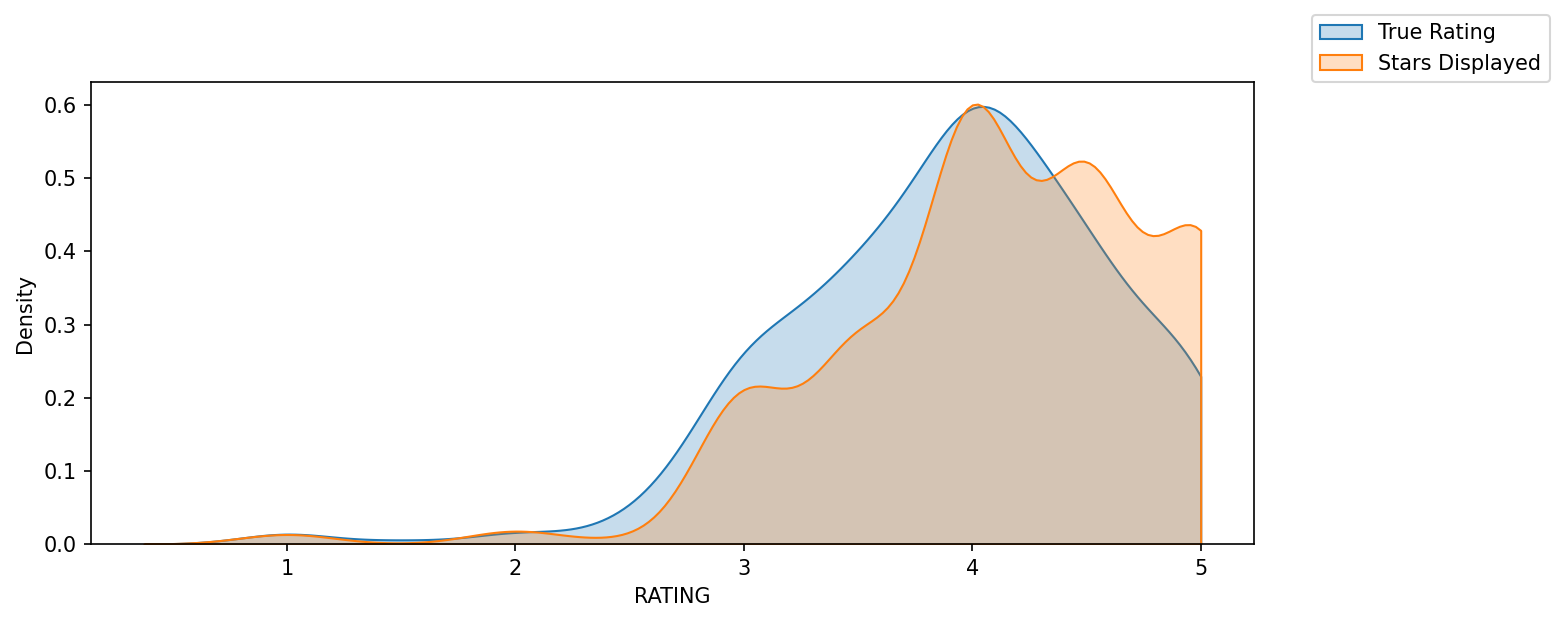

In [22]:
# Logically, votes are always more realistic than the rating displayed. Let's compare by visualizing
plt.figure(figsize=(10,4),dpi=150)
sns.kdeplot(data=fan_reviewed,x='RATING',clip=[0,5],fill=True,label='True Rating')
sns.kdeplot(data=fan_reviewed,x='STARS',clip=[0,5],fill=True,label='Stars Displayed')

plt.legend(loc=(1.05,1))

In [23]:
# looks like rating is a bit bigger than the reality

In [24]:
# let's see difference
fan_reviewed['DIFF'] = fan_reviewed['STARS'] - fan_reviewed['RATING'] 
fan_reviewed['DIFF'] = fan_reviewed['DIFF'].round(2)

fan_reviewed.head(8)

/var/folders/3q/skgzq3x13wdcb3xxw5dz6j_40000gn/T/ipykernel_1125/1993250093.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['DIFF'] = fan_reviewed['STARS'] - fan_reviewed['RATING']
/var/folders/3q/skgzq3x13wdcb3xxw5dz6j_40000gn/T/ipykernel_1125/1993250093.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['DIFF'] = fan_reviewed['DIFF'].round(2)


,FILM,STARS,RATING,VOTES,YEAR,DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014,0.2
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015,0.3
7,Minions (2015),4.0,4.0,14998,2015,0.0


In [25]:
fan_reviewed.nlargest(10, 'STARS')

,FILM,STARS,RATING,VOTES,YEAR,DIFF
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015,0.5
10,Cinderella (2015),5.0,4.5,12640,2015,0.5
11,Ant-Man (2015),5.0,4.5,12055,2015,0.5
19,Straight Outta Compton (2015),5.0,4.8,8096,2015,0.2
21,The Imitation Game (2014),5.0,4.6,8055,2014,0.4
24,Selma (2014),5.0,4.6,7025,2014,0.4
32,Southpaw (2015),5.0,4.6,5597,2015,0.4
43,Dragon Ball Z: Resurrection 'F' (2015),5.0,4.8,3740,2015,0.2


there is a lot of shifting going on here!

<Axes: xlabel='DIFF', ylabel='count'>

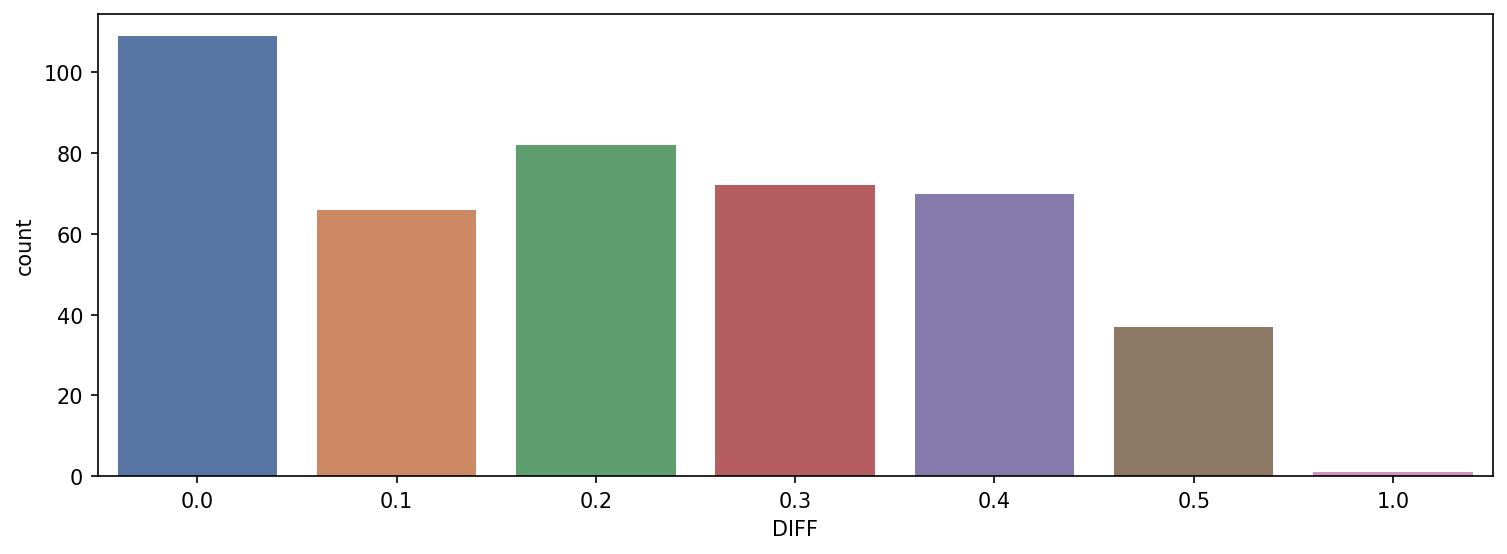

In [26]:
plt.figure(figsize=(12,4),dpi=150)
sns.countplot(data=fan_reviewed,x='DIFF',palette='deep')

# Step 3: Compare statistics

In [27]:
scores = pd.read_csv('./fandango_score_comparison')

In [28]:
scores.head(4)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5


In [29]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Fandango_Stars              146 non-null    float64
 7   Fandango_Ratingvalue        146 non-null    float64
 8   RT_norm                     146 non-null    float64
 9   RT_user_norm                146 non-null    float64
 10  Metacritic_norm             146 non-null    float64
 11  Metacritic_user_nom         146 non-null    float64
 12  IMDB_norm                   146 non-null    float64
 13  RT_norm_round               146 non

In [30]:
scores.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,4.089041,3.845205,3.042466,3.193836,2.940411,...,3.368493,3.065068,3.226027,2.972603,3.270548,3.380137,185.705479,42846.205479,3848.787671,0.243836
std,30.168799,20.024430,19.517389,1.510712,0.958736,0.540386,0.502831,1.508440,1.001222,0.975869,...,0.479368,1.514600,1.007014,0.990961,0.788116,0.502767,316.606515,67406.509171,6357.778617,0.152665
min,5.000000,20.000000,13.000000,2.400000,4.000000,3.000000,2.700000,0.250000,1.000000,0.650000,...,2.000000,0.500000,1.000000,0.500000,1.000000,2.000000,4.000000,243.000000,35.000000,0.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,3.500000,3.500000,1.562500,2.500000,2.175000,...,3.150000,1.500000,2.500000,2.125000,3.000000,3.000000,33.250000,5627.000000,222.250000,0.100000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,4.000000,3.900000,3.175000,3.325000,2.950000,...,3.450000,3.000000,3.500000,3.000000,3.500000,3.500000,72.500000,19103.000000,1446.000000,0.200000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,4.500000,4.200000,4.450000,4.050000,3.750000,...,3.700000,4.500000,4.000000,4.000000,4.000000,3.500000,168.500000,45185.750000,4439.500000,0.400000
max,100.000000,94.000000,94.000000,9.600000,8.600000,5.000000,4.800000,5.000000,4.700000,4.700000,...,4.300000,5.000000,4.500000,4.500000,5.000000,4.500000,2375.000000,334164.000000,34846.000000,0.500000


(0.0, 100.0)

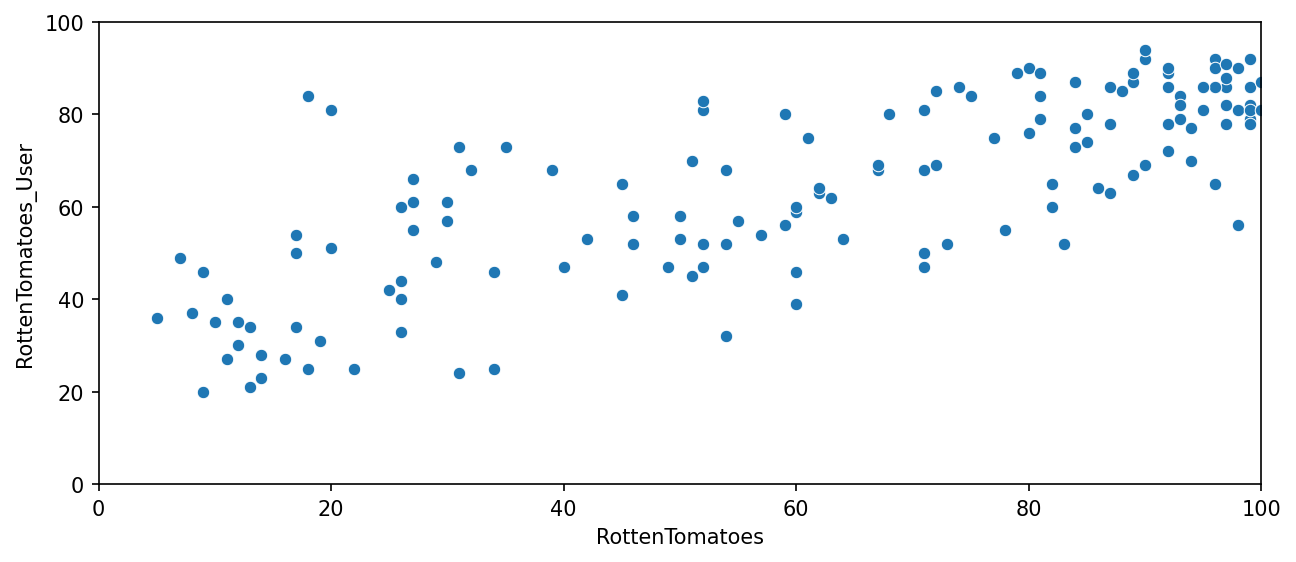

In [31]:
# 1. RottenTomatoes
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=scores,x='RottenTomatoes',y='RottenTomatoes_User')
plt.xlim(0,100)
plt.ylim(0,100)

In [32]:
scores['RottenTomatoes_diff'] = scores['RottenTomatoes'] - scores['RottenTomatoes_User']
scores['RottenTomatoes_diff'].apply(abs)
scores.nlargest(10, 'RottenTomatoes_diff')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,RottenTomatoes_diff
69,Mr. Turner (2014),98,56,94,6.6,6.9,3.5,3.2,4.90,2.80,...,5.0,3.0,4.5,3.5,3.5,98,13296,290,0.3,42
112,It Follows (2015),96,65,83,7.5,6.9,3.0,2.9,4.80,3.25,...,5.0,3.5,4.0,4.0,3.5,551,64656,2097,0.1,31
115,While We're Young (2015),83,52,76,6.7,6.4,3.0,2.9,4.15,2.60,...,4.0,2.5,4.0,3.5,3.0,65,17647,449,0.1,31
37,Welcome to Me (2015),71,47,67,6.9,5.9,4.0,3.6,3.55,2.35,...,3.5,2.5,3.5,3.5,3.0,33,8301,56,0.4,24
40,I'll See You In My Dreams (2015),94,70,75,6.9,6.9,4.0,3.6,4.70,3.50,...,4.5,3.5,4.0,3.5,3.5,14,1151,281,0.4,24
145,"Kumiko, The Treasure Hunter (2015)",87,63,68,6.4,6.7,3.5,3.5,4.35,3.15,...,4.5,3.0,3.5,3.0,3.5,19,5289,41,0.0,24
90,The SpongeBob Movie: Sponge Out of Water (2015),78,55,62,6.5,6.1,3.5,3.3,3.90,2.75,...,4.0,3.0,3.0,3.5,3.0,196,26046,4493,0.2,23
7,Top Five (2014),86,64,81,6.8,6.5,4.0,3.5,4.30,3.20,...,4.5,3.0,4.0,3.5,3.5,124,16876,3223,0.5,22
11,Black Sea (2015),82,60,62,6.6,6.4,4.0,3.5,4.10,3.00,...,4.0,3.0,3.0,3.5,3.0,37,16547,218,0.5,22
87,Maggie (2015),54,32,52,6.5,5.6,3.5,3.3,2.70,1.60,...,2.5,1.5,2.5,3.5,3.0,90,18986,95,0.2,22


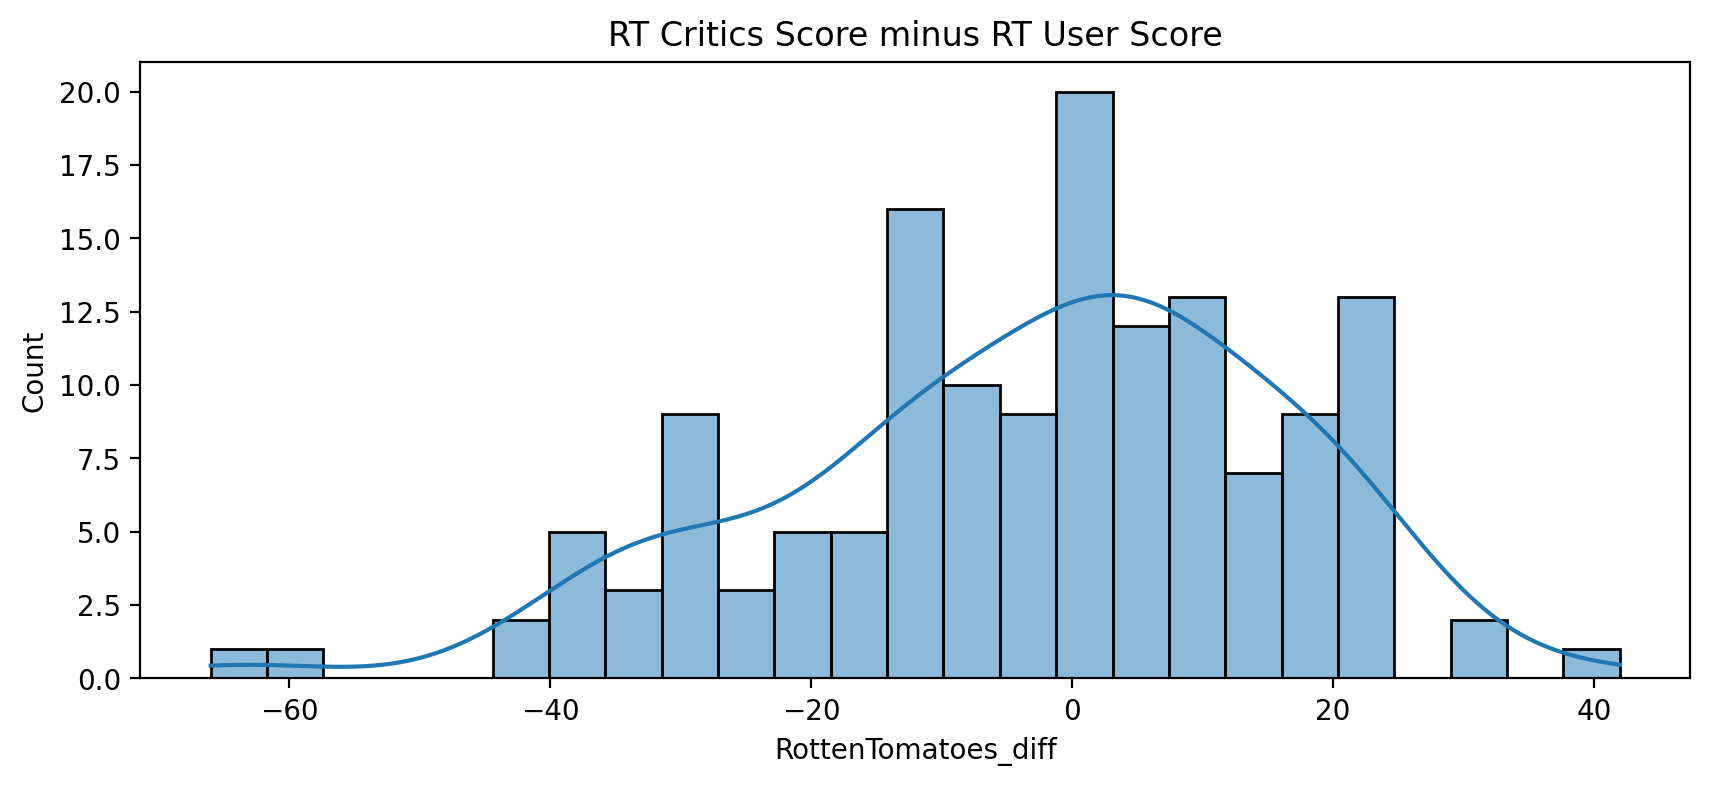

In [33]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data=scores,x='RottenTomatoes_diff',kde=True,bins=25)
plt.title("RT Critics Score minus RT User Score");

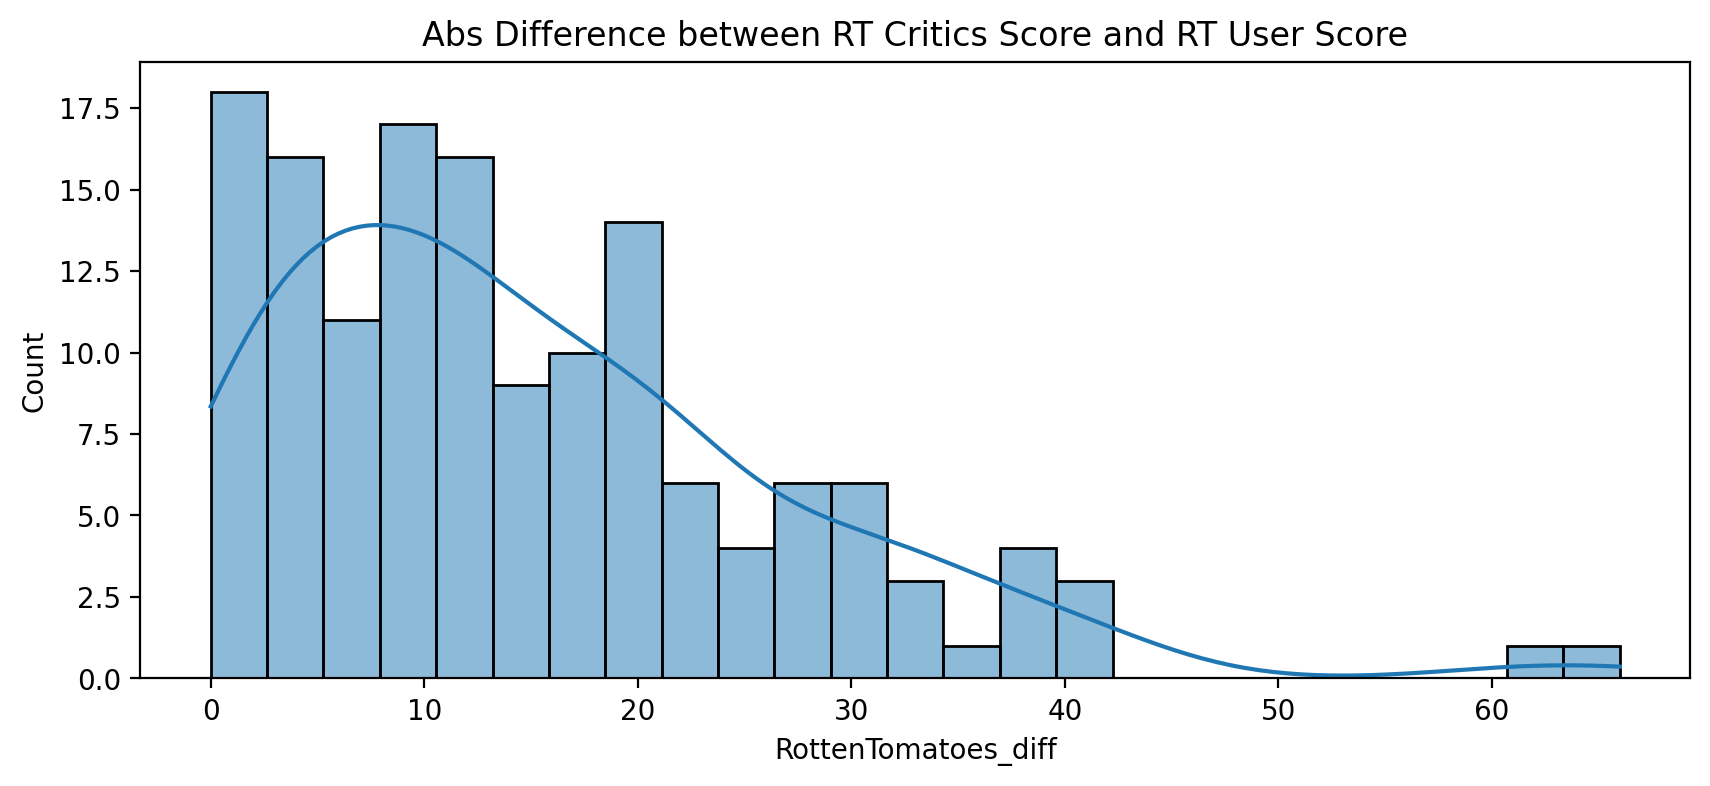

In [34]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(x=scores['RottenTomatoes_diff'].apply(abs),bins=25,kde=True)
plt.title("Abs Difference between RT Critics Score and RT User Score");

(0.0, 10.0)

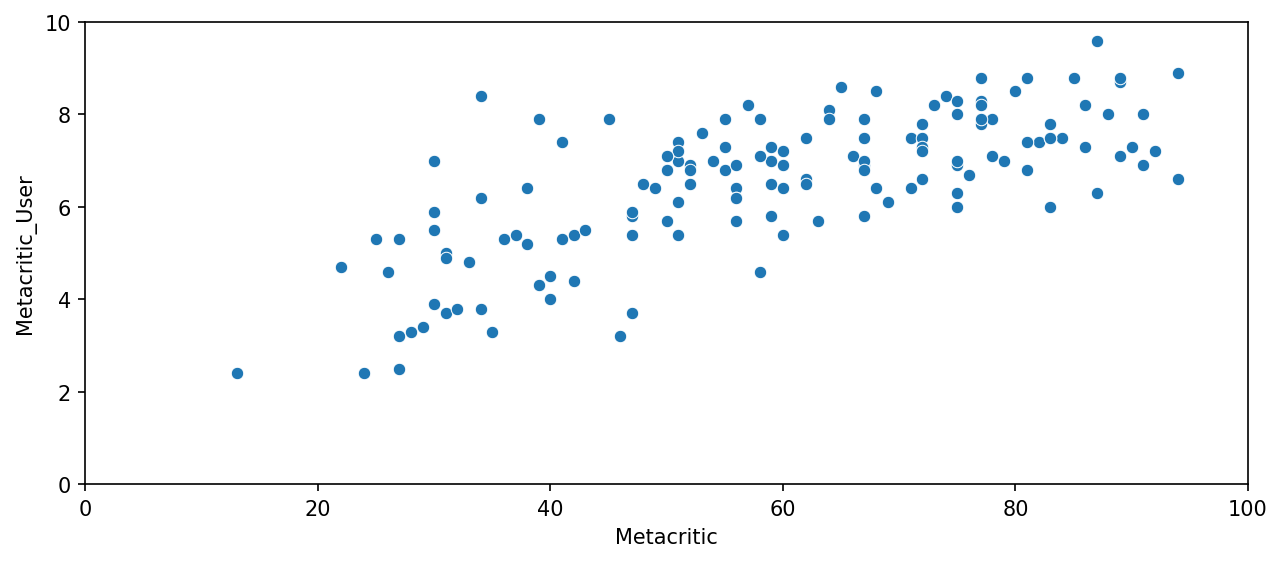

In [35]:
# 2. Metacritic
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=scores,x='Metacritic',y='Metacritic_User')
plt.xlim(0,100)
plt.ylim(0,10)

<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

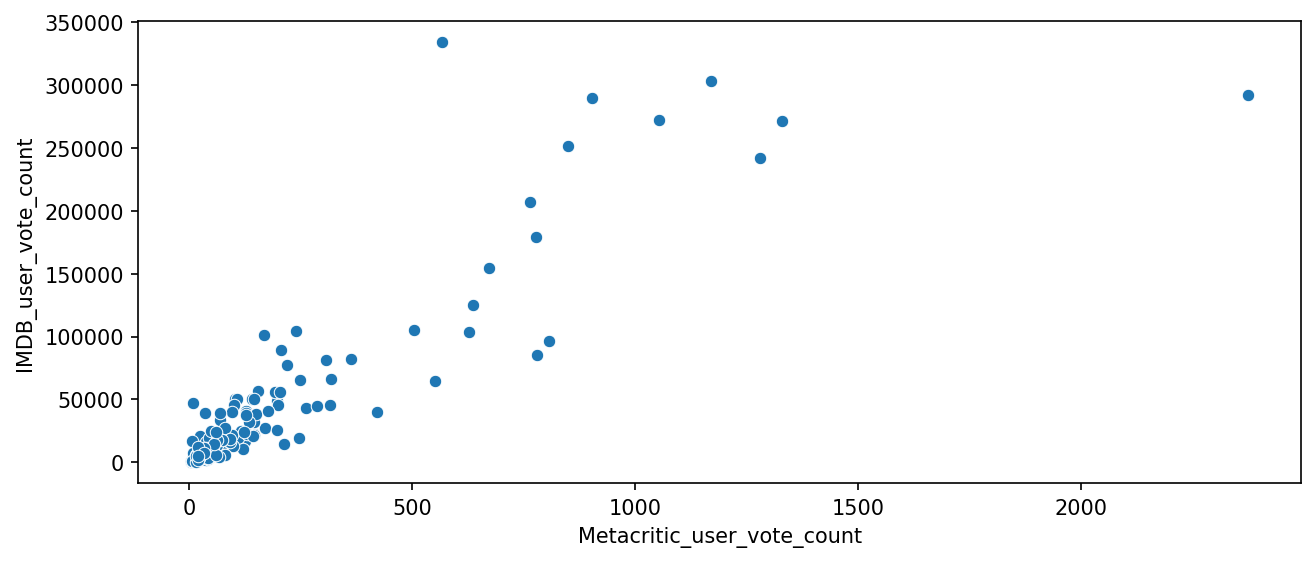

In [36]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=scores,x='Metacritic_user_vote_count',y='IMDB_user_vote_count')

In [37]:
scores.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,RottenTomatoes_diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,5.0,4.6,4.5,4.6,...,4.5,4.5,3.5,4.0,4.0,566,334164,8055,0.4,-2


In [38]:
scores.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,RottenTomatoes_diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,4.5,4.3,4.85,4.4,...,5.0,4.5,4.5,4.5,4.0,2375,292023,10509,0.2,9


In [39]:
df = pd.merge(fandango,scores,on='FILM',how='inner')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Fandango_Stars              145 non-null    float64
 11  Fandango_Ratingvalue        145 non-null    float64
 12  RT_norm                     145 non-null    float64
 13  RT_user_norm                145 non

In [41]:
df.head(5)

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,RottenTomatoes_diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,...,1.5,2.0,2.5,1.5,2.0,778,179506,34846,0.1,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,...,3.5,4.0,3.0,3.5,3.5,1281,241807,34390,0.0,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,...,3.5,4.5,3.5,3.5,3.5,850,251856,34085,0.2,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,...,4.0,4.0,3.5,3.5,3.5,764,207211,33538,0.2,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,...,5.0,4.5,4.5,4.5,4.5,807,96252,15749,0.0,8


In [42]:
# Normalizing all ratings
df['RT_Norm'] = np.round(df['RottenTomatoes']/20,1)
df['RTU_Norm'] =  np.round(df['RottenTomatoes_User']/20,1)
df['Meta_Norm'] =  np.round(df['Metacritic']/20,1)
df['Meta_U_Norm'] =  np.round(df['Metacritic_User']/2,1)
df['IMDB_Norm'] = np.round(df['IMDB']/2,1)

df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,...,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,RottenTomatoes_diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,...,778,179506,34846,0.1,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,...,1281,241807,34390,0.0,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,...,850,251856,34085,0.2,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,...,764,207211,33538,0.2,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,...,807,96252,15749,0.0,8,4.9,4.5,4.7,4.4,4.3


In [43]:
norms = df[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm']]

In [44]:
norms.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


In [45]:
norms['Fandango_Stars'] = norms['STARS']
norms['Fandango_Rating'] = norms['RATING']
norms = norms.drop('STARS', axis=1)
norms = norms.drop('RATING', axis=1)

norms.head()

/var/folders/3q/skgzq3x13wdcb3xxw5dz6j_40000gn/T/ipykernel_1125/2400260701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norms['Fandango_Stars'] = norms['STARS']
/var/folders/3q/skgzq3x13wdcb3xxw5dz6j_40000gn/T/ipykernel_1125/2400260701.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norms['Fandango_Rating'] = norms['RATING']


,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,Fandango_Stars,Fandango_Rating
0,1.2,2.1,2.3,1.6,2.1,4.0,3.9
1,3.6,4.0,3.0,3.5,3.6,4.5,4.5
2,3.6,4.2,3.6,3.3,3.7,5.0,4.8
3,4.0,4.2,3.4,3.4,3.7,5.0,4.8
4,4.9,4.5,4.7,4.4,4.3,4.5,4.5


/var/folders/3q/skgzq3x13wdcb3xxw5dz6j_40000gn/T/ipykernel_1125/756631845.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=norms,clip=[0,8],shade=True,palette='Set2',ax=ax)


<Axes: ylabel='Density'>

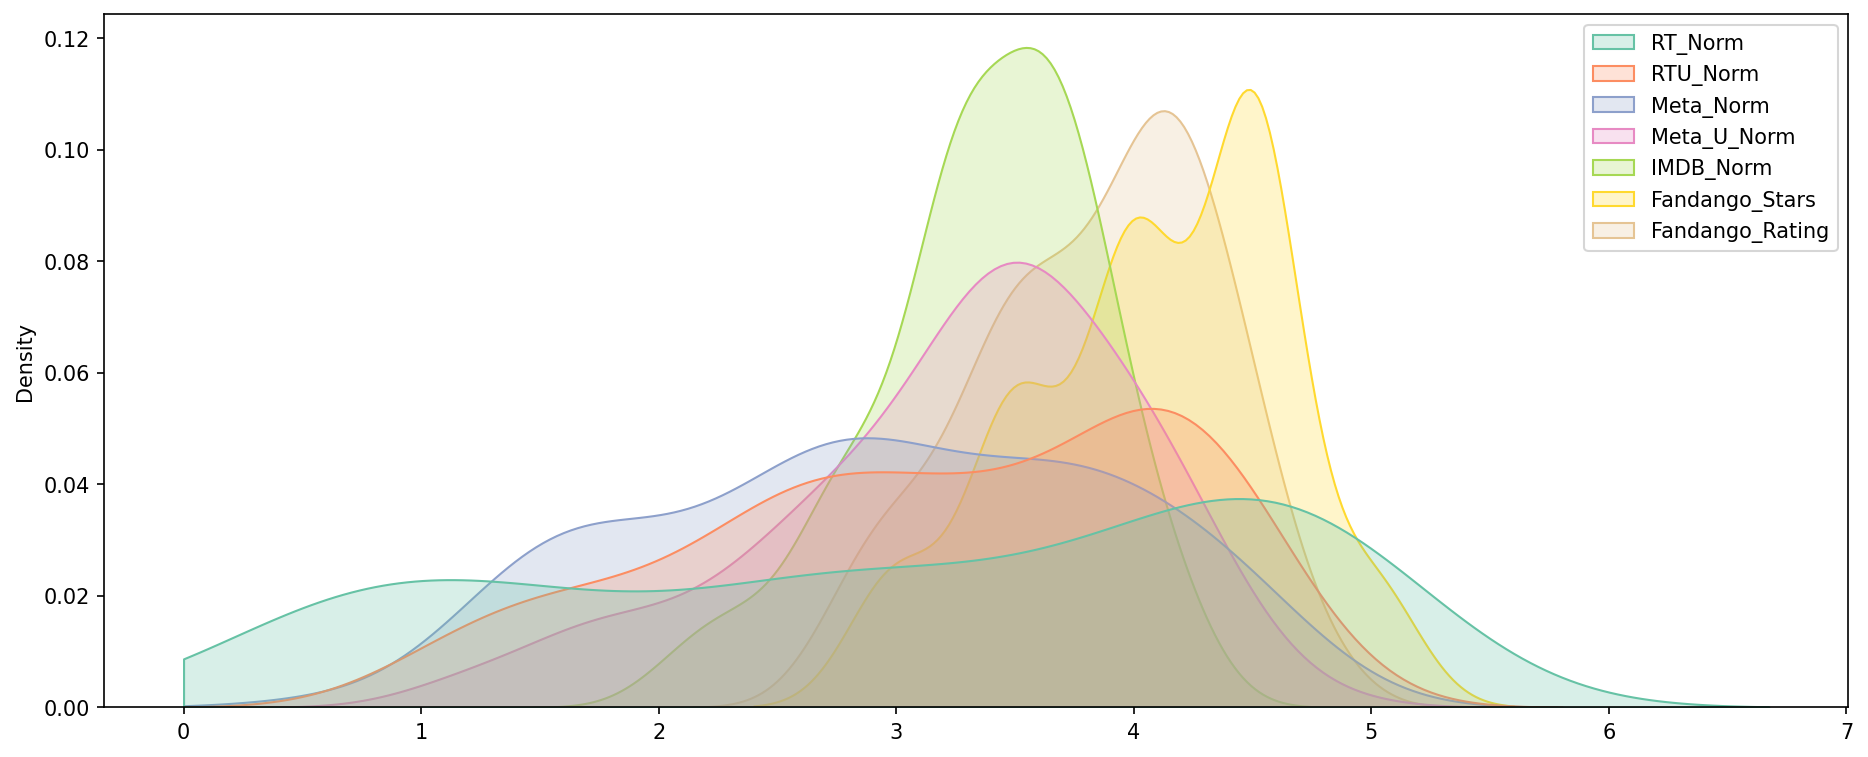

In [46]:
# all in one
fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=norms,clip=[0,8],shade=True,palette='Set2',ax=ax)

<Axes: ylabel='Count'>

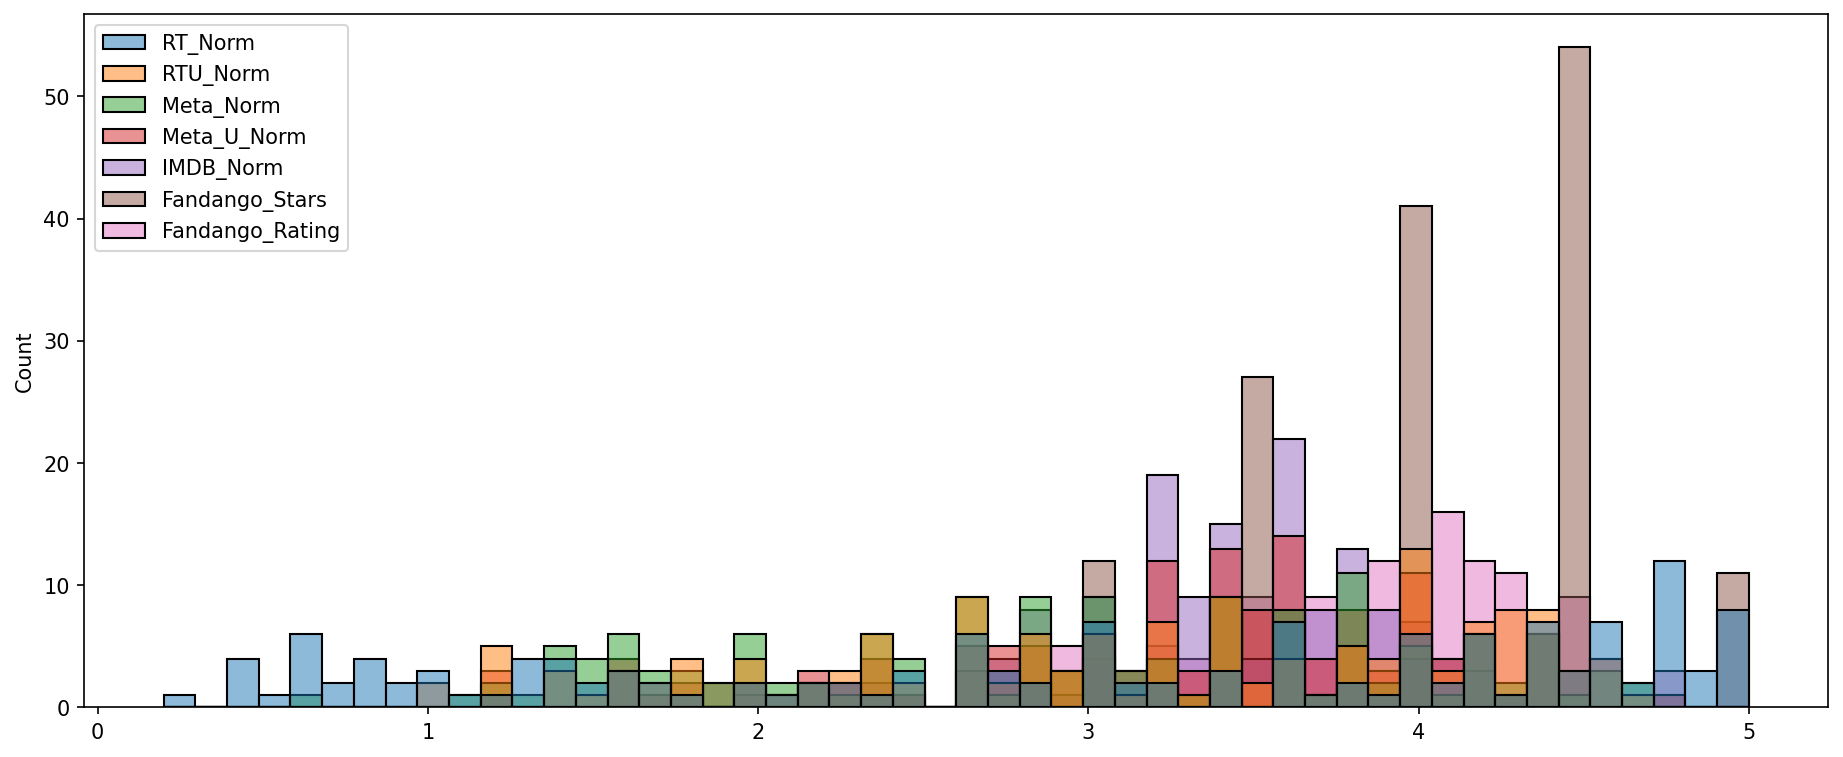

In [47]:
plt.subplots(figsize=(15,6),dpi=150)
sns.histplot(norms,bins=50)

/var/folders/3q/skgzq3x13wdcb3xxw5dz6j_40000gn/T/ipykernel_1125/1545054775.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=worst_films,clip=[0,5],shade=True,palette='Set1')


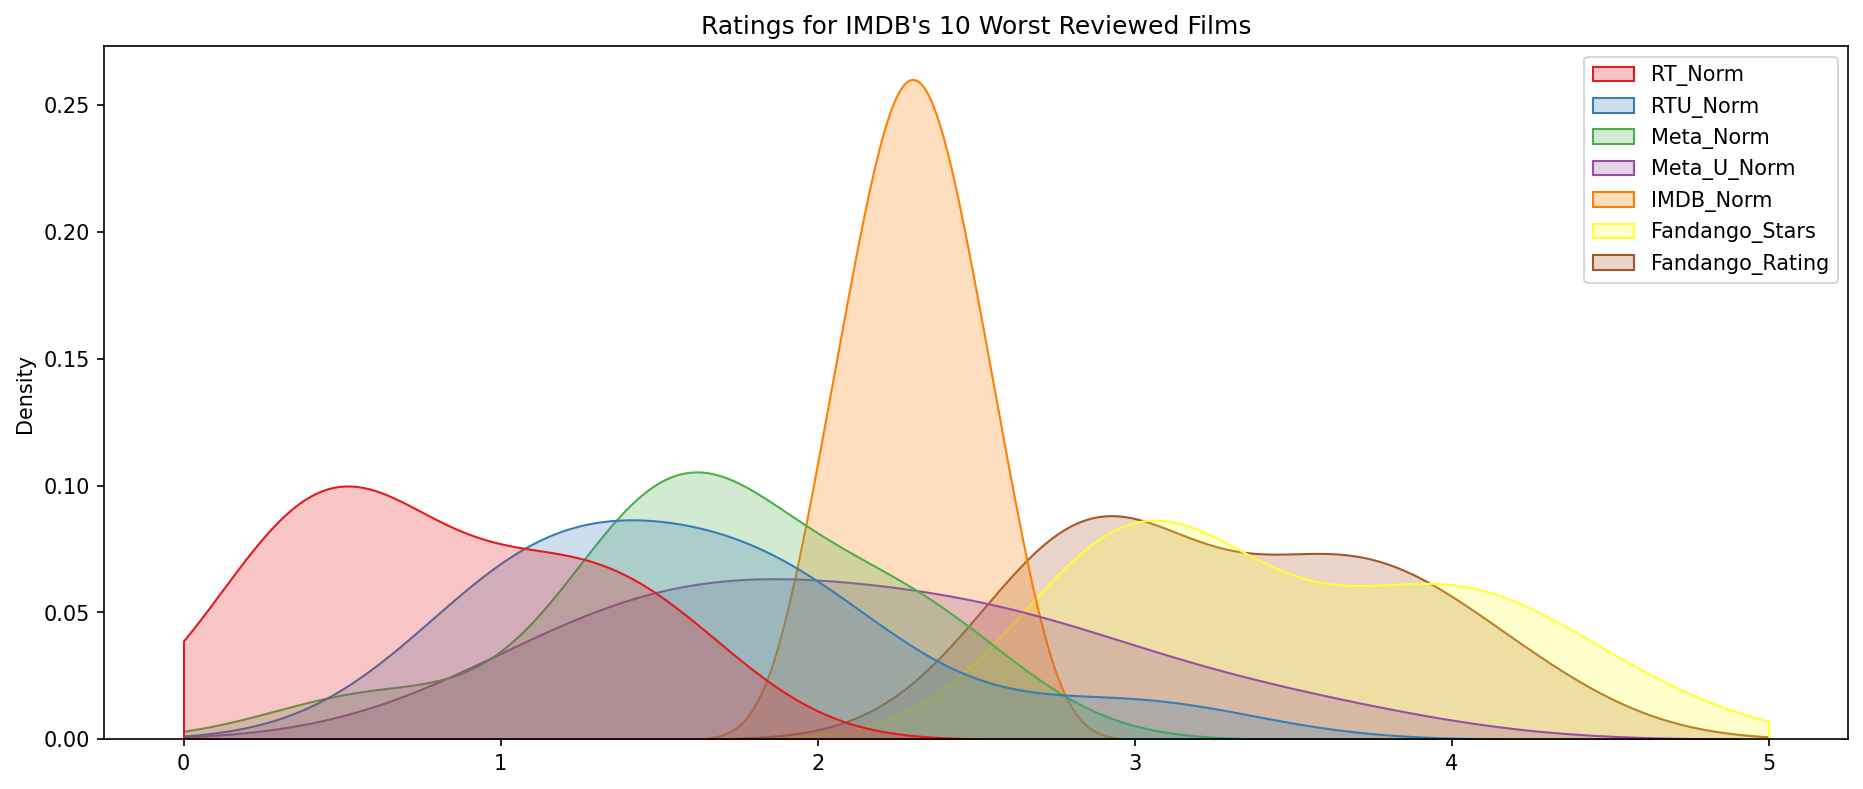

In [48]:
plt.figure(figsize=(15,6),dpi=150)
worst_films = norms.nsmallest(10,'IMDB_Norm')
sns.kdeplot(data=worst_films,clip=[0,5],shade=True,palette='Set1')
plt.title("Ratings for IMDB's 10 Worst Reviewed Films");